<font color="#CA3532"><h1 align="left">Auditoría de datos</h1></font>

**Manuel Sánchez-Montañés**

## <font color="#CA3532">Inspección y auditoría de datos</font>

El primer paso siempre es mirar los datos y ver qué contienen. Algunas tareas típicas que se realizan durante esta etapa son calcular estadísticas descriptivas básicas y representar histogramas y diagramas de dispersión para diferentes pares de variables son .

Primero importamos las librerías *pandas* y *matplotlib*, establecemos el modo en línea *matplotlib* y establecemos el estilo de dibujo:

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

### <font color="#CA3532">Carga de datos con *pandas*</font>

Ahora cargaremos unos datos sencillos usando la función <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html">pandas.read_csv</a>:

In [3]:
data = pd.read_csv("../datasets/small.csv",
                   na_values = ["?", "none"],
#                   sep = ","
                  )

Mostramos los datos que acabamos de leer:

In [4]:
data

,var1,var2,var3,var4,var5,var6
0,1,4.0,NaN,NaN,NaN,NaN
1,2,2.0,3.0,NaN,NaN,38.0
2,1,2.5,2.5,1.0,tc,39.0
3,2,3.5,1.5,0.0,tc,34.0
4,2,2.5,2.5,NaN,tc,39.0


In [ ]:
data.dtypes

Repetimos lo mismo pero ahora con ua base de datos más grande:

In [5]:
data = pd.read_csv("../datasets/adult.csv", na_values = ["?"],
#                   sep = ","
                  )
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
data.shape

(32561, 15)

In [7]:
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
class             object
dtype: object

### <font color="#CA3532">Estadísticas descriptivas</font>

Puedes sacar pon pantalla estadísticas descriptivas básicas usando el método <a  href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html#pandas-dataframe-describe"> pandas.DataFrame.describe</a>, tanto para variables numéricas:

In [8]:
data.describe().T[["count", "min", "max", "mean", "std"]]

,count,min,max,mean,std
age,32561.0,17.0,90.0,38.581647,13.640433
fnlwgt,32561.0,12285.0,1484705.0,189778.366512,105549.977697
education-num,32561.0,1.0,16.0,10.080679,2.572720
capital-gain,32561.0,0.0,99999.0,1077.648844,7385.292085
capital-loss,32561.0,0.0,4356.0,87.303830,402.960219
hours-per-week,32561.0,1.0,99.0,40.437456,12.347429


como para variables categóricas:

In [9]:
data.describe(include = "object").T

,count,unique,top,freq
workclass,30725,8,Private,22696
education,32561,16,HS-grad,10501
marital-status,32561,7,Married-civ-spouse,14976
occupation,30718,14,Prof-specialty,4140
relationship,32561,6,Husband,13193
race,32561,5,White,27816
sex,32561,2,Male,21790
native-country,31978,41,United-States,29170
class,32561,2,<=50K,24720


Por cada variable se puede contar el número de repeticiones de cada valor con el método <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html#pandas-series-value-counts">pandas.Series.value_counts()</a>. Aunque esto se puede realizar tanto en atributos numéricos como categóricos, tiene mucho más sentido hacerlo en los categóricos:

In [10]:
data["workclass"].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

Podemos chequear ahora si hay alguna variable que presente valores ausentes (missing values):

In [11]:
#data.isnull()
data.isna()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32557,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32558,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32559,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
data.isna().any()

age               False
workclass          True
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation         True
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country     True
class             False
dtype: bool

Y contar cuántos missing values hay en cada variable:

In [13]:
100*data.isna().mean()

age               0.000000
workclass         5.638647
fnlwgt            0.000000
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        5.660146
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
native-country    1.790486
class             0.000000
dtype: float64

In [14]:
aux = 100*data.isna().mean()
aux

age               0.000000
workclass         5.638647
fnlwgt            0.000000
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        5.660146
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
native-country    1.790486
class             0.000000
dtype: float64

In [15]:
aux[aux>0]

workclass         5.638647
occupation        5.660146
native-country    1.790486
dtype: float64

In [16]:
from mi_libreria import my_missings, my_message

In [17]:
my_message()

Hola


### <font color="#CA3532">Visualización de los datos</font>

Finalmente podemos realizar diferentes tipos de gráficos para visualizar los datos.

Histogramas para datos numéricos:

In [18]:
data["capital-gain"].unique()

array([ 2174,     0, 14084,  5178,  5013,  2407, 14344, 15024,  7688,
       34095,  4064,  4386,  7298,  1409,  3674,  1055,  3464,  2050,
        2176,   594, 20051,  6849,  4101,  1111,  8614,  3411,  2597,
       25236,  4650,  9386,  2463,  3103, 10605,  2964,  3325,  2580,
        3471,  4865, 99999,  6514,  1471,  2329,  2105,  2885, 25124,
       10520,  2202,  2961, 27828,  6767,  2228,  1506, 13550,  2635,
        5556,  4787,  3781,  3137,  3818,  3942,   914,   401,  2829,
        2977,  4934,  2062,  2354,  5455, 15020,  1424,  3273, 22040,
        4416,  3908, 10566,   991,  4931,  1086,  7430,  6497,   114,
        7896,  2346,  3418,  3432,  2907,  1151,  2414,  2290, 15831,
       41310,  4508,  2538,  3456,  6418,  1848,  3887,  5721,  9562,
        1455,  2036,  1831, 11678,  2936,  2993,  7443,  6360,  1797,
        1173,  4687,  6723,  2009,  6097,  2653,  1639, 18481,  7978,
        2387,  5060], dtype=int64)

In [19]:
import numpy as np
np.unique(data["capital-gain"])

array([    0,   114,   401,   594,   914,   991,  1055,  1086,  1111,
        1151,  1173,  1409,  1424,  1455,  1471,  1506,  1639,  1797,
        1831,  1848,  2009,  2036,  2050,  2062,  2105,  2174,  2176,
        2202,  2228,  2290,  2329,  2346,  2354,  2387,  2407,  2414,
        2463,  2538,  2580,  2597,  2635,  2653,  2829,  2885,  2907,
        2936,  2961,  2964,  2977,  2993,  3103,  3137,  3273,  3325,
        3411,  3418,  3432,  3456,  3464,  3471,  3674,  3781,  3818,
        3887,  3908,  3942,  4064,  4101,  4386,  4416,  4508,  4650,
        4687,  4787,  4865,  4931,  4934,  5013,  5060,  5178,  5455,
        5556,  5721,  6097,  6360,  6418,  6497,  6514,  6723,  6767,
        6849,  7298,  7430,  7443,  7688,  7896,  7978,  8614,  9386,
        9562, 10520, 10566, 10605, 11678, 13550, 14084, 14344, 15020,
       15024, 15831, 18481, 20051, 22040, 25124, 25236, 27828, 34095,
       41310, 99999], dtype=int64)

In [20]:
sum(data["capital-gain"] == 99999)

159

In [21]:
np.unique(data["marital-status"],
          return_counts=True)

(array(['Divorced', 'Married-AF-spouse', 'Married-civ-spouse',
        'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed'],
       dtype=object),
 array([ 4443,    23, 14976,   418, 10683,  1025,   993], dtype=int64))

In [22]:
data["marital-status"].value_counts()

marital-status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64

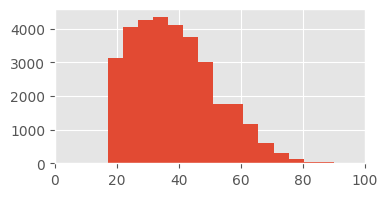

In [23]:
data["age"].hist(bins=15, figsize=(4,2)) # 4 ancho, 2 alto
plt.xlim(0,100);

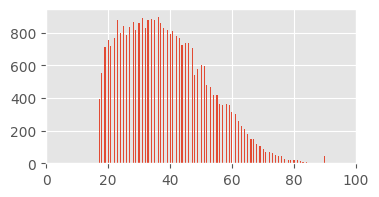

In [24]:
data["age"].hist(bins=200, figsize=(4,2)) # 4 ancho, 2 alto
plt.xlim(0,100);


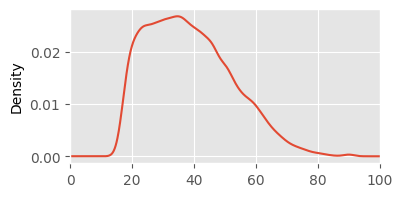

In [25]:
data["age"].plot.density(figsize=(4,2))
plt.xlim(0,100);

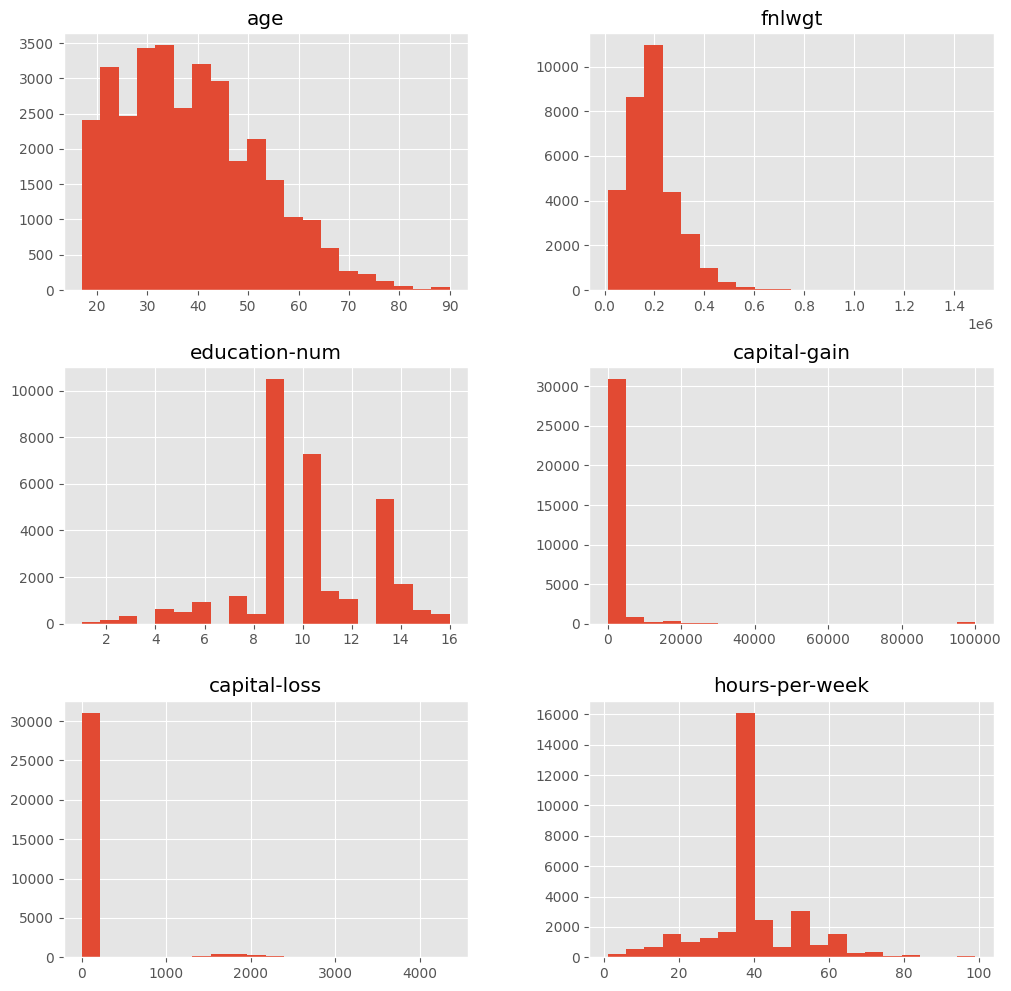

In [26]:
h = data.hist(bins = 20, figsize = (12, 12))

Y diagramas de barras o circulares (también conocidos como "diagramas de tarta") mostrando el número de repeticiones de cada valor en un atributo categórico:

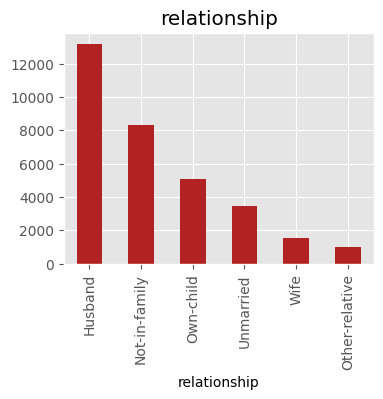

In [27]:
var = "relationship"
h = data[var].value_counts().plot(kind = 'bar',
                                  figsize = (4, 3),
                                  title = var,
                                  color = 'firebrick')

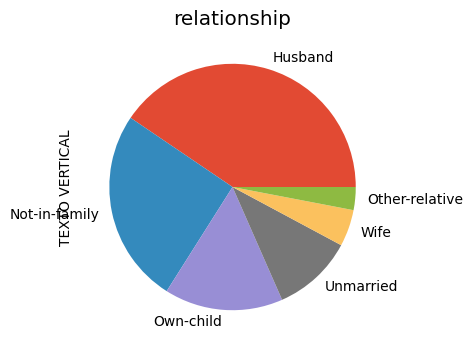

In [31]:
var = "relationship"
h = data[var].value_counts().plot(kind = 'pie',
                                  figsize = (4, 4),
                                  title = var).set_ylabel('TEXTO VERTICAL')

Si queremos mostrar todos los gráficos circulares juntos podemos hacer:

In [32]:
data.dtypes == object

age               False
workclass          True
fnlwgt            False
education          True
education-num     False
marital-status     True
occupation         True
relationship       True
race               True
sex                True
capital-gain      False
capital-loss      False
hours-per-week    False
native-country     True
class              True
dtype: bool

In [33]:
import numpy as np
categorical_data = data.loc[:, data.dtypes == object].copy() #con : se seleccionan todas las columnas
numerical_data   = data.loc[:, data.dtypes != object].copy()

In [34]:
categorical_data.head(5)

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,class
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [35]:
numerical_data.head(5)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [ ]:
categorical_data.columns

In [41]:
for i, var in enumerate(categorical_data.columns):
    print(i)
    print(i%2, (i%2)==0, i%2+1)
    
categorical_data.columns

0
0 True 1
1
1 False 2
2
0 True 1
3
1 False 2
4
0 True 1
5
1 False 2
6
0 True 1
7
1 False 2
8
0 True 1


Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'class'],
      dtype='object')

0 True 1
1 False 2


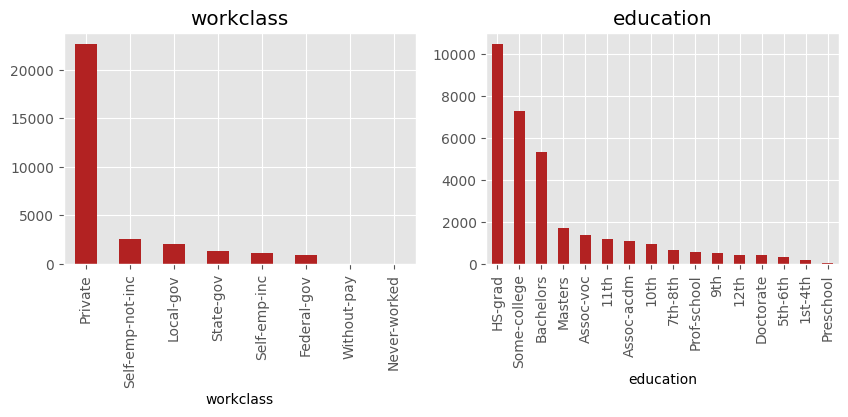

0 True 1
1 False 2


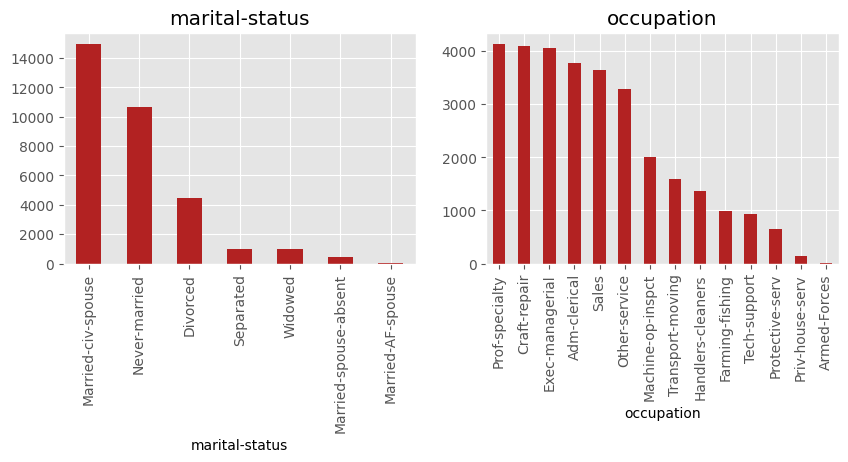

0 True 1
1 False 2


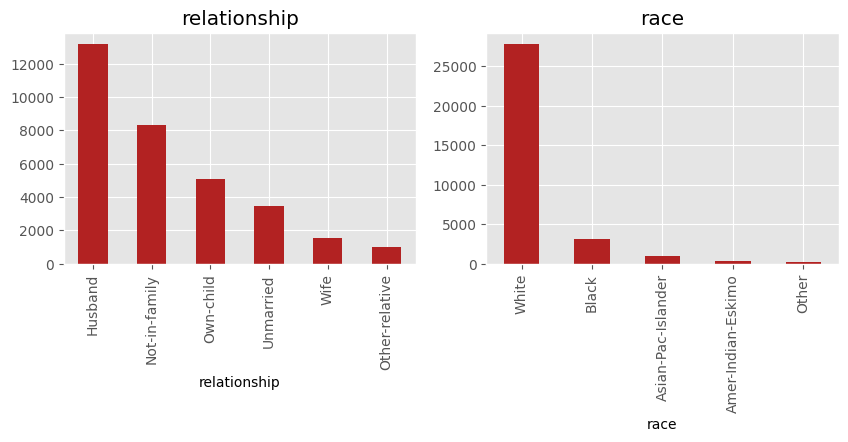

0 True 1
1 False 2


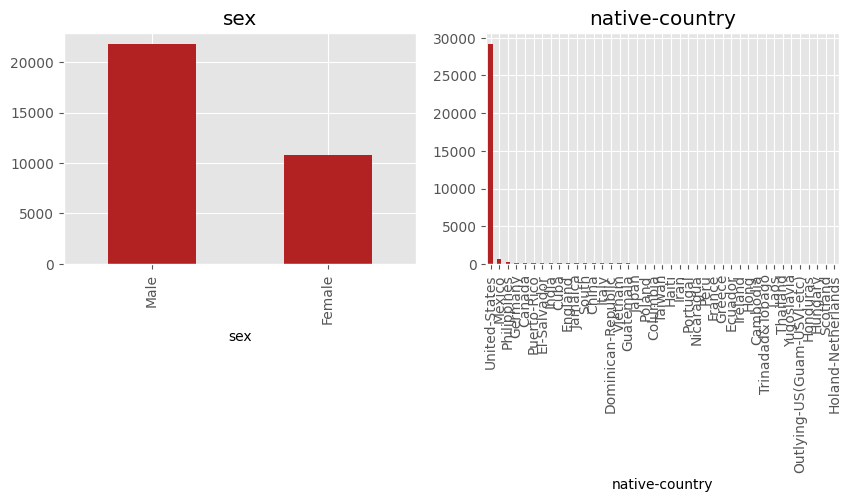

0 True 1


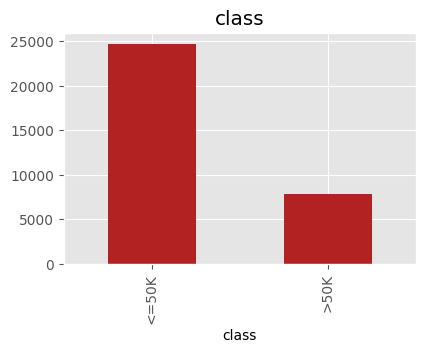

In [42]:
for i, var in enumerate(categorical_data.columns):
    print(i%2, (i%2)==0, i%2+1)
    
    if i%2 == 0:
        plt.figure(figsize=(10,3))
    # plt.subplot(num_filas, num_cols, num_figura_a_dibujar)
    plt.subplot(1,2,i%2+1) # si i es par, el tercer argumento es 1. Si no, es 2
    p = categorical_data[var].value_counts().plot(kind = 'bar',
                                                  color='firebrick',
                                                  title = var)
    if i%2 == 1:
        
        plt.show()
    
    #input("Intro para seguir");

#### Diagramas de dispersión para datos numéricos:

In [ ]:
#?data.plot.scatter

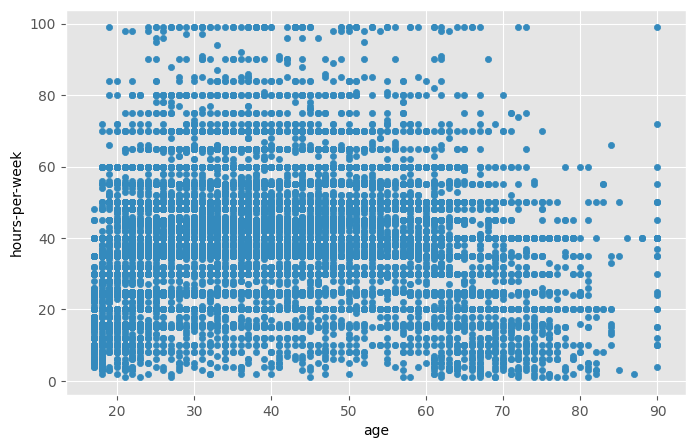

In [43]:
h = data.plot.scatter(x='age', y='hours-per-week',
                      figsize = (8, 5))

#### Para que se vea mejor la estructura de la nube de puntos introducimos un factor alpha (transparencia):

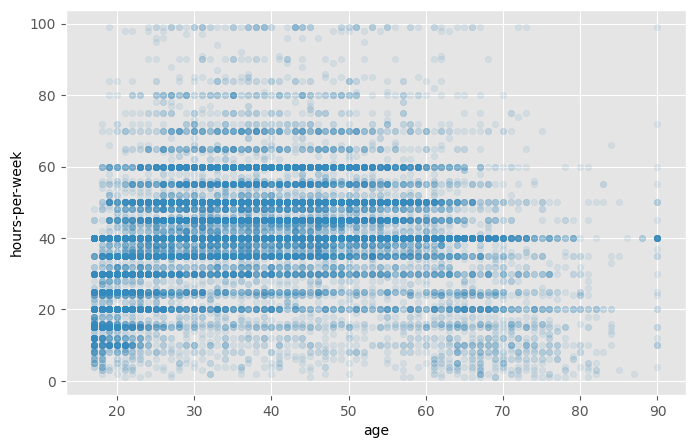

In [44]:
h = data.plot.scatter(x='age', y='hours-per-week', 
                      figsize = (8, 5),
                      alpha=0.1)

In [ ]:
h = pd.plotting.scatter_matrix(data, alpha=0.005, figsize=(12, 12),
                               diagonal='kde', marker = 'o', s = 50)

#### Y si ahora quiero distinguir los puntos de cada clase con colores:

In [46]:
np.unique(data['class'])

array(['<=50K', '>50K'], dtype=object)

In [47]:
labels = data['class'] == '>50K'

In [48]:
labels

0        False
1        False
2        False
3        False
4        False
         ...  
32556    False
32557     True
32558    False
32559    False
32560     True
Name: class, Length: 32561, dtype: bool

In [ ]:
h = pd.plotting.scatter_matrix(data, alpha=0.01, figsize=(12, 12),
                               diagonal='kde', marker = 'o', s = 50,
                               c = labels)

In [ ]:
import seaborn as sns # librería avanzada de visualización

In [ ]:
data.head()

In [49]:
# datos numéricos:

data_num = data.loc[:,data.dtypes != object]
data_num.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [50]:
# correlación entre todas las variables numéricas:

data_num.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


#### Matriz de correlación dibujada como heatmap

Información sobre diferentes mapas de color: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

In [51]:
sns.heatmap(data_num.corr(), cmap="bwr", vmin=-1, vmax=1);

NameError: name 'sns' is not defined

In [ ]:
# matriz de correlación dibujada de manera ordenada con clustermap:

sns.clustermap(data_num.corr(), cmap="bwr", vmin=-1, vmax=1,
               figsize=(5,5));

#### Ahora añado "class_num" que es una columna numérica nueva que es 1 si class<=50K, y 0 en caso contrario:

In [52]:
data2 = data_num.copy()
data2["class_num"] = 1*labels
data2

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,class_num
0,39,77516,13,2174,0,40,0
1,50,83311,13,0,0,13,0
2,38,215646,9,0,0,40,0
3,53,234721,7,0,0,40,0
4,28,338409,13,0,0,40,0
...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,0
32557,40,154374,9,0,0,40,1
32558,58,151910,9,0,0,40,0
32559,22,201490,9,0,0,20,0


In [ ]:
# clustermap teniendo en cuenta esta variable:

sns.clustermap(data2.corr(), cmap="bwr", vmax=1, vmin=-1,
               figsize=(5,5));

In [ ]:
# correlación de todas las variables numéricas con class_num:

data2.corr()["class_num"]

Para más información sobre visualización usando *pandas*: https://pandas.pydata.org/pandas-docs/stable/visualization.html

### <font color="#CA3532">Ejercicio</font>

Crea una versión de este notebook donde cargues la base de datos *loan.csv* (carpeta datasets) y resuelve las siguientes preguntas:

- ¿Cuántas instancias (filas) hay?  ¿y cuántos atributos (columnas)?
- ¿Hay valores ausentes (missing)?
- ¿Hay otros valores que deberían ser tratados como missing?
- ¿Hay alguna variable que deberíamos descartar?
- ¿Hay alguna variable que debería transformarse?
- ¿Hay otros hechos relevantes que deberían ser comentados?

**Nota:** para entender el problema descarga y lee detenidamente el fichero **loan_data_dictionary.xls** (carpeta datasets) . Este fichero contiene la descripción de las columnas del dataset.
Una estrategia muy útil en la práctica es "incrustar" esta descripción en el notebook del ejercicio. La idea es cargar este excel como si fuera otra tabla y visualizarla dentro del notebook. De esa forma toda la información relevante estará contenida en el notebook.

In [54]:
pd.options.display.max_colwidth = 200
pd.read_excel("../datasets/loan_data_dictionary.xls", header=1).set_index("Variable Name")


















,Description,Type
Variable Name,,
SeriousDlqin2yrs,Person experienced 90 days past due delinquency or worse,Y/N
RevolvingUtilizationOfUnsecuredLines,Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits,percentage
age,Age of borrower in years,integer
NumberOfTime30-59DaysPastDueNotWorse,Number of times borrower has been 30-59 days past due but no worse in the last 2 years.,integer
DebtRatio,"Monthly debt payments, alimony,living costs divided by monthy gross income",percentage
MonthlyIncome,Monthly income,real
NumberOfOpenCreditLinesAndLoans,Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards),integer
NumberOfTimes90DaysLate,Number of times borrower has been 90 days or more past due.,integer
NumberRealEstateLoansOrLines,Number of mortgage and real estate loans including home equity lines of credit,integer


In [ ]:
# leo y muestro diccionario de datos:
pd.read_excel("../datasets/loan_data_dictionary.xls", header=1).set_index("Variable Name")

In [ ]:
# leo dataset:
data = pd.read_csv("../datasets/loan.csv")
data.sample(5).T

In [ ]:
data.describe().T[["count", "min", "max", "mean", "std"]]

In [ ]:
data.shape

In [ ]:
data.dtypes

In [ ]:
len(data), data["ID"].nunique()

In [ ]:
# Conclusión: ID es un identificador único. Lo pongo como índice:

data = data.set_index("ID")

In [ ]:
# Histograma de las variables:

data.hist(figsize=(10,40), layout=(10,2));

In [ ]:
my_missings(data)

In [ ]:
data_num = data.loc[:, data.dtypes != object]

In [ ]:
data_num.mean()

In [ ]:
# Una estrategia para quitar missing values:

data2 = data.fillna(value={"MonthlyIncome": 1000,
                           "NumberOfDependents": data["NumberOfDependents"].median()})

# Otra:

data2 = data.fillna(data_num.mean())

In [ ]:
# Tras lo que no quedará ningún missing value:

my_missings(data2)

In [ ]:
# Lo que en realidad haremos: eliminar filas que contienen missing values en MonthlyIncome:

data3 = data.dropna(subset=["MonthlyIncome"])

In [ ]:
data3.shape

In [ ]:
my_missings(data3)

In [ ]:
# Como vemos, esto ha eliminado los missing values también en NumberOfDependents.
# Es decir, todas las filas con missing en NumberOfDependents tenían missing
# también en MonthlyIncome 

In [ ]:
data3.describe().T[["count", "min", "max", "mean", "std"]]

In [ ]:
aux = data3["age"].value_counts()
for i,x in zip(aux.index,aux):
    print(i,x)

In [ ]:
# Hay valores de edad < 18, por lo que los quitamos:

data3 = data3[data3["age"]>=18]

In [ ]:
# A continuación representaremos las variables numéricas logarítmicamente:

In [ ]:
cols = data3.columns.drop("SeriousDlqin2yrs")
cols

In [ ]:
def faux(x):
    return np.log10(1+x)

data4 = data3.copy()
cols = data3.columns.drop("SeriousDlqin2yrs")
for c in cols:
    data4[c] = data4[c].apply(faux)

In [ ]:
# Histogramas sin logaritmos:
data.hist(figsize=(10,40), layout=(10,2));

In [ ]:
# Histogramas con logaritmos:
data4.hist(figsize=(10,40), layout=(10,2));